###  PYTHON-13. Визуализация данных 
#### 9. Закрепление знаний

In [13]:
import pandas as pd
# прочитаем данные
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# bpeчим набор столбцов, размер таблицы, пропуски данных и типы данных
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

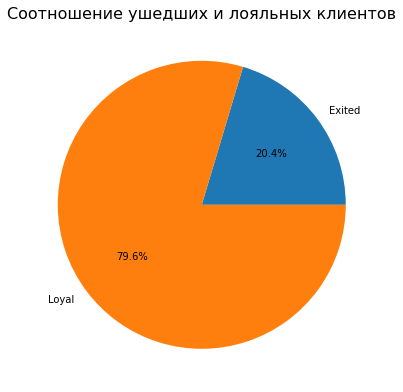

In [50]:
# построим круговую диаграмму
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('Соотношение ушедших и лояльных клиентов', fontsize=16);axes.pie(
    [churn_data['Exited'].sum(), churn_data['RowNumber'].max() - churn_data['Exited'].sum()],
    labels=['Exited', 'Loyal'],
    autopct='%.1f%%',);


**Комментарии к графику:**
1. Более 20% клиентов больше не являются клиентами банка.
2. Соотношение ушедших клиентов к оставшимся - 1:4.

#### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

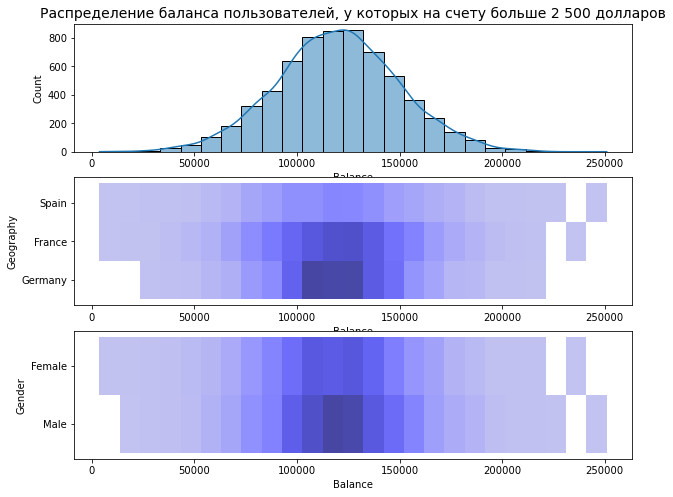

In [98]:
# Построим три гистограммы: 
    # одна иллюстрирует общее распределение баланса пользователей, у которых на счету больше 2 500 долларов;
    # вторая — распределение этих ползователей в разрезе стран;
    # третья - распределение этих пользователей в разрезе половой принадлежности. 
import seaborn as sns
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))
axes[0].set_title('Распределение баланса пользователей, у которых на счету больше 2 500 долларов', fontsize=14)
sns.histplot(
    data=churn_data[churn_data['Balance'] > 2500],
    x='Balance',
    bins=25,
    kde=True,
    ax=axes[0]);
sns.histplot(
    data=churn_data[churn_data['Balance'] > 2500],
    x='Balance',
    y='Geography',
    bins=25,
    color='blue',
    ax=axes[1]);
sns.histplot(
    data=churn_data[churn_data['Balance'] > 2500],
    x='Balance',
    y='Gender',
    bins=25,
    color='blue',
    ax=axes[2]);

**Комментарии к графику:**
1. Общая гистограмма показывает: 
    - максимальный размер баланса - 250 тыс. долларов;
    - наибольшее количество рассматриваемых пользователей имеет баланс от 110 до 130 тыс. долларов.
2. Гистограмма по странам показывает:
    - балансы пользователей из Испании в целом ниже, чем во Франции и Германии;
    - концентрация пользователей с балансом от 110 до 130 тыс. долларов в Германии выше, чем в других странах.
3. Гистограмма по половой структуре показывает:
    - балансы женщин в целом ниже по сравнению с мужчинами;
    - наибольшее число эенщин имеет баланса в более широком диапазоне: от 100 до 130 тыс. долларов.

#### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

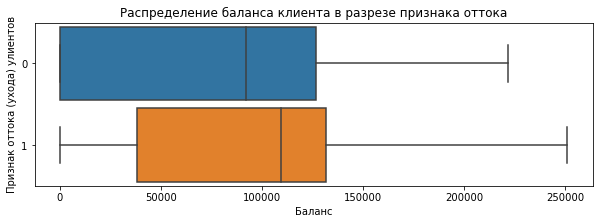

In [96]:
fig = plt.figure(figsize=(10, 3))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.9)
boxplot.set_title('Распределение баланса клиента в разрезе признака оттока');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('Признак оттока (ухода) улиентов');

**Комментарии к графику:**
1. Разброс значений баланса ушедших клиентов в целом шире, чем лояльных.
2. Основное количество ушедших клиентов имело баланс более 40 тыс. долларов, тогда как среди лояльных немало клиентов с около нулевым балансом.
3. Медианный уровень баланса ушедших клиентов выше, чем у лояльных.

Таким образом видим, что уходили более состоятельные клиенты, что, возможно было вызвано недостаточно привлекательными условиями для таких клиентов (или отсутствием продуктов, заточенных под них), либо недостаточными гарантиями сохранности средств на счете.

#### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

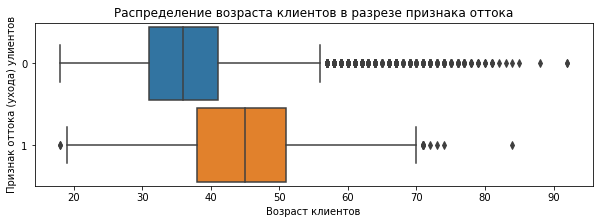

In [95]:
fig = plt.figure(figsize=(10, 3))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9)
boxplot.set_title('Распределение возраста клиентов в разрезе признака оттока');
boxplot.set_xlabel('Возраст клиентов');
boxplot.set_ylabel('Признак оттока (ухода) улиентов');

**Комментарии к графику:**
1. Число потенциальных выбросов по возрасту среди лояльных клиентов значительно больше, чем среди ушедших.
2. Мы видим, что есть лояльные клиенты с возрастом 85+ лет. ХотяНесмотря на то, что это вполне возможно, все же есть шанс, что эти клиенты намеренно или ошибочно указали неверный возраст - это необходимо дополнительно проверить.
3. Основное количество ушедших клиентов старше лояльных.
4. Медианный возраст ушедших клиентов также выше, чем у лояльных.

Таким образом, видно, что банку необходимо уделить внимание потребностям клиентов более старшего возраста: в первую очередь от 38 до 52 лет.

#### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

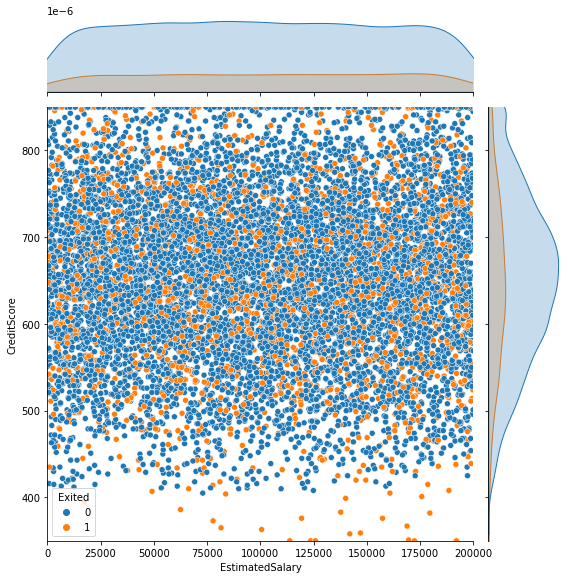

In [107]:
jointplot = sns.jointplot(
    data=churn_data, 
    x='EstimatedSalary', 
    y='CreditScore',
    hue='Exited',
    xlim = (0,200000),
    ylim = (350, 850),
    height=8,)

**Комментарии к графику:**
1. Максимальный размер предполагаемой зарплаты - 200 тыс. долларов. В то же время есть клиенты с нулевой зарплатой.
2. Подавляющее большинство клиентов получает зарплату от 25 до 175 тыс. долларов - практически одинаковое число клиентов. Это справедливо как для лояльных клиентов, так и для ушедших.
3. Кредитный рейтинг находится в диапазоне от 350 до 850.
4. Наибольшее число клиентов имеет рейтинг от 600 до 700. Это относится как к ушедшим клиентам, так и к лояльным, однако для лояльных это выражено сильнее.
5. Четкой взаимосвязи между предполагаемой зарплатой и кредитным рейтингом не проглядывается.

#### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [167]:
# Высчитываем число клиентов по необходимым категориям
male_exited = churn_data[(churn_data['Exited'] == 1) & (churn_data['Gender'] == 'Male')].count()[0]
male_loyal = churn_data[churn_data['Gender'] == 'Male'].count()[0] - male_exited
female_exited = churn_data[(churn_data['Exited'] == 1) & (churn_data['Gender'] == 'Female')].count()[0]
female_loyal = churn_data[churn_data['Gender'] == 'Female'].count()[0] - female_exited
total = churn_data.count()[0]

# Переходим к диаграммам
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Категории клиентов
labels = ["Ушедшие клиенты","Лояльные клиенты"]

# Создаем две круговых диаграммы
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=[male_exited, male_loyal], name="Мужчины"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=[female_exited, female_loyal], name="Женщины"), 1, 2)

# Вырезаем круг в центре
fig.update_traces(hole=.5)

fig.update_layout(
    title_text="Соотношение ушедших и лояльных клиентов в разрезе половой структуры",
    # Подписи в центре
    annotations=[dict(text='Мужчины<br>' + str(round((male_exited+male_loyal)/total*100, 0))+'%', 
                      x=0.16, y=0.5, font_size=18, showarrow=False),
                 dict(text='Женщины<br>' + str(round((female_exited+female_loyal)/total*100, 0))+'%', 
                      x=0.85, y=0.5, font_size=18, showarrow=False)])
fig.show()

**Комментарии к графику:**
1. Мужчин среди клиентов банка немного больше (55% от общего числа).
2. Женщины уходят чаще: 25,1% женщин уходят из банка против 16,5% мужчин

#### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

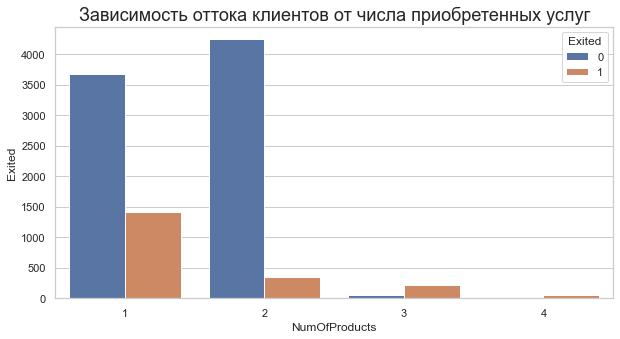

In [195]:
fig = plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
barplot = sns.barplot(
    data=churn_data,
    x='NumOfProducts',
    y='Exited',
    hue='Exited',
    estimator=lambda x: len(x),
)
barplot.set_title('Зависимость оттока клиентов от числа приобретенных услуг', fontsize=18);

**Комментарии к графику:**
1. С увеличением количества приобретенных услуг количество ушедших клиентов снижается. Однако это связано не с ростом лояльности, а с простым уменьшением количества клиентов при увеличении числа купленных услуг.
2. Большинство ушедших клиентов купило 1 или 2 услуги. Это связано с тем, что общее количество клиентов, купивших 1 или 2 услуги также наибольшее.
3. Почти все клиенты, купившие 3 услуги, и все, купившие 4 услуги, ушли.

Таким образом очевидно, что на данном этапе предложение клиенту более 2х услуг приводит к 85%+ вероятности ухода клиента.

#### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

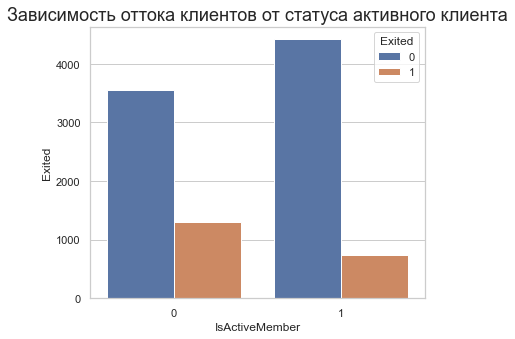

In [194]:
fig = plt.figure(figsize=(6 , 5))
sns.set_theme(style="whitegrid")
barplot = sns.barplot(
    data=churn_data,
    x='IsActiveMember',
    y='Exited',
    hue='Exited',
    estimator=lambda x: len(x),
)
barplot.set_title('Зависимость оттока клиентов от статуса активного клиента', fontsize=18);

**Комментарии к графику:**
1. При большем общем количестве активные клиенты банка уходят реже по сравнению с неактивными.
2. Более 25% неактивных клиентов уходят.

Предположительно, разработка новых продуктов, интересных неактивным клиентам, вкупе с учащением попыток (обзвоны, встречи, предложение услуг и пр.) перевести клиентов в активный статус - все это поможет снизить отток неактивных клиентов.

#### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [321]:
choropleth_data = churn_data.groupby(by='Geography',as_index=False)['Exited'].agg(['sum', 'count'])
choropleth_data['Exited_share'] = round(choropleth_data['sum'] / choropleth_data['count'] * 100, 1)

#строим график
fig = px.choropleth(
    data_frame=choropleth_data, #DataFrame
    locations=choropleth_data.index, #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color='Exited_share', #от чего зависит цвет
    range_color=[15, 35], #диапазон цвета
    title='Доля ушедших клиентов по странам на карте мира, %', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds') #палитра цветов

#отображаем график
fig.show()

**Комментарии к графику:**
1. Германия  демонстрирует самый высокий % оттока клиентов (32,4%) - почти в 2 раза выше уровня остальных стран.
2. Франция и Испания по доле ушедших клиентов находятся на одном уровне (16,2% и 16,7% соответственно).

Таким образом, для снижения оттока клиентов необходимо уделить особое внимание пользователям из Германии.

#### 9.10. Постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.
- Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(). Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга
- Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
- На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

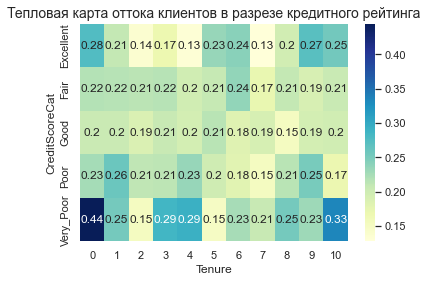

In [334]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

# Готовим данные, создаем признак CreditScoreCat — категории кредитного рейтинга
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

# Строим сводную таблицу
churn_data_pivot = churn_data.pivot_table(
    values = 'Exited',
    index = 'CreditScoreCat',
    columns = 'Tenure',)

# Тепловая карта с аннотацией
heatmap = sns.heatmap(data=churn_data_pivot, annot=True, cmap='YlGnBu')
heatmap.set_title('Тепловая карта оттока клиентов в разрезе кредитного рейтинга', fontsize=14);

**Комментарии к графику:**
1. Чаще всего уходят клиенты с очень плохим кредитным рейтингом и околонулевым опытом работы с банком (новые клиенты, до 1 года).
2. Также чаще других уходят клиенты с очень плохим кредитным рейтингом и значительным опытом работы с банком 10 лет.
3. Клиенты с очень плохим кредитным рейтингом в целом чаще других уходят из банка.
4. Вместе с тем следуюет обратить внимание на клиентов с отличным кредитным рейтингом и опытом работы с банком 0, 9, 10, а также 5 и 6 лет - отток этих клиентов выше остальных.